<h1>Linear Regression with Many Variables</h1>

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Creating the Data Nomalization Function

In [2]:
def data_normalization (dataset):
    columns_mean = []
    columns_std = []

    dataset = np.transpose(dataset)
        
    for i in range(len(dataset)):
        columns_std.append(np.std(dataset[i]))
        columns_mean.append(np.mean(dataset[i]))

        dataset[i] = dataset[i] - columns_mean[i]
        dataset[i] = dataset[i] * (1/columns_std[i])
        
    dataset = np.transpose(dataset)
    
    return dataset, columns_mean, columns_std

Entering, normalizing and formating the Data

In [3]:
# The data bellow contains a training set of housing prices in Portland, Oregon. 
# The first column is the size of the house (in square feet), 
# the second column is the number of bedrooms, 
# and the third column is the price of the house.

dataset_house_prices = np.array([[2104.0,3,399900],
[1600,3,329900],
[2400,3,369000],
[1416,2,232000],
[3000,4,539900],
[1985,4,299900],
[1534,3,314900],
[1427,3,198999],
[1380,3,212000],
[1494,3,242500],
[1940,4,239999],
[2000,3,347000],
[1890,3,329999],
[4478,5,699900],
[1268,3,259900],
[2300,4,449900],
[1320,2,299900],
[1236,3,199900],
[2609,4,499998],
[3031,4,599000],
[1767,3,252900],
[1888,2,255000],
[1604,3,242900],
[1962,4,259900],
[3890,3,573900],
[1100,3,249900],
[1458,3,464500],
[2526,3,469000],
[2200,3,475000],
[2637,3,299900],
[1839,2,349900],
[1000,1,169900],
[2040,4,314900],
[3137,3,579900],
[1811,4,285900],
[1437,3,249900],
[1239,3,229900],
[2132,4,345000],
[4215,4,549000],
[2162,4,287000],
[1664,2,368500],
[2238,3,329900],
[2567,4,314000],
[1200,3,299000],
[852,2,179900],
[1852,4,299900],
[1203,3,239500]])

dataset_house_prices, columns_mean, columns_std = data_normalization(dataset_house_prices) #Normalizing the data and recording the mean and standart deviating for each column
dataset_house_prices = np.insert(dataset_house_prices, 0, 1, axis = 1) #Add a column of ones to the dataset
x = dataset_house_prices[0:,0:3]
y = dataset_house_prices[0:,3:4]

Plotting the Data

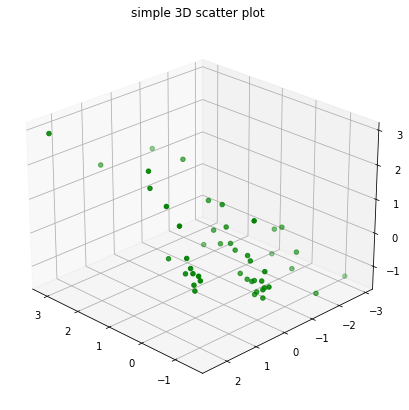

In [4]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x[0:,1], x[0:,2], y, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
ax.view_init(25,135)
plt.show()

Creating the Cost Function and Linear Gradient Discent function for more than one variable

In [5]:
def computes_cost_function (x, y, theta):
    m = len(x)

    predicted_y = np.matmul(x, theta)

    cost_function = (1/(2 * m)) * np.sum(np.square(predicted_y - y))

    return cost_function

def computes_linear_gradient_discent (x, y, theta, iterations, alpha):
    m = len(x)
    cost_function = []

    for _ in range(iterations):
        
        predicted_y = np.matmul(x, theta)
        theta[0][0] = theta[0][0] - alpha * (1 / m) * np.sum(predicted_y - y)

        for i in range(1,len(theta)):
            theta[i][0] = theta[i][0] - alpha * (1 / m) * x[0:,i:(1+i)].T.dot(predicted_y - y) 

        cost_function.append(computes_cost_function(x, y, theta))

    return theta, cost_function

Calculating Theta and plotting the Cost Funtion over the iterations

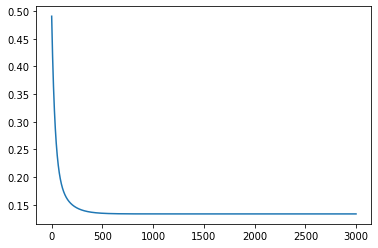

In [6]:
iterations = 3000
alpha = 0.01
theta = np.zeros((3,1))

theta, cost_function = computes_linear_gradient_discent(x, y, theta, iterations, alpha)

plt.plot(cost_function)

Plotting our final prediction

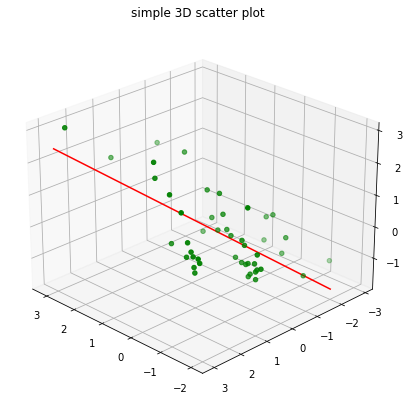

In [7]:
x1_final_prediction = []
x2_final_prediction = []
y_final_prediction = []

min = int(np.min(x[0:,1:3]))
max = int(np.max(x[0:,1:3]))

for i in range(min, max+1):
    x1_final_prediction.append(i)
    x2_final_prediction.append(i)
    y_final_prediction.append(theta[0][0] + theta[1][0]*i + theta[2][0]*i)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x[0:,1], x[0:,2], y, color = "green")
plt.title("simple 3D scatter plot")

#ploting predicted line
ax.plot3D(x1_final_prediction, x2_final_prediction, y_final_prediction, 'r')
 
# show plot
ax.view_init(25,135)

plt.show()